<a href="https://colab.research.google.com/github/AbuNuurah/Ede-indigenous-man/blob/master/Population_MlpBusari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from numpy import array
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
import time
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
series = pd.read_csv('Population.csv', header=0 )

In [0]:
series.columns

Index(['Date', 'Urban population (% of total population)', 'Urban population',
       'Urban population growth (annual %)',
       'Rural population (% of total population)',
       'Rural population growth (annual %)', 'Rural population',
       'Population, male (% of total population)', 'Population, male',
       'Population, female (% of total population)', 'Population, female',
       'Population, total', 'Population growth (annual %)'],
      dtype='object')

In [0]:
series.columns = ['Date','UP%','UP','UPG','RP%','RPG','RP','PM%','PM','PF%','PF','PT','PGA%']

In [0]:
series.head()

,Date,UP%,UP,UPG,RP%,RPG,RP,PM%,PM,PF%,PF,PT,PGA%
0,1960,15.410,6955836,6.815307,84.590,1.118942,38182622,49.914966,22530846,50.085034,22607612,45138458,1.975879
1,1961,15.633,7201117,3.465513,84.367,1.764790,38862446,49.922674,22996163,50.077326,23067400,46063563,2.028764
2,1962,15.858,7457989,3.504965,84.142,1.808919,39571833,49.931301,23482602,50.068699,23547220,47029822,2.075966
3,1963,16.087,7727058,3.544239,83.913,1.837969,40305876,49.940460,23987868,50.059540,24045066,48032934,2.110499
4,1964,16.318,8006714,3.555224,83.682,1.853827,41060046,49.949726,24508712,50.050274,24558048,49066760,2.129492


In [0]:
series.describe()

,Date,UP%,UP,UPG,RP%,RPG,RP,PM%,PM,PF%,PF,PT,PGA%
count,59.000000,59.000000,5.900000e+01,59.000000,59.000000,59.000000,5.900000e+01,59.000000,5.900000e+01,59.000000,5.900000e+01,5.900000e+01,59.000000
mean,1989.000000,29.534441,3.463558e+07,4.609757,70.465559,1.603785,6.689331e+07,50.289259,5.115449e+07,49.710741,5.037440e+07,1.015289e+08,2.521186
std,17.175564,10.745748,2.634755e+07,0.720013,10.745748,0.411253,1.834157e+07,0.229339,2.245890e+07,0.229339,2.168540e+07,4.414421e+07,0.229124
min,1960.000000,15.410000,6.955836e+06,3.465513,49.656000,0.938766,3.818262e+07,49.914966,2.253085e+07,49.336114,2.260761e+07,4.513846e+07,1.975879
25%,1974.500000,19.571500,1.223899e+07,4.094746,62.216000,1.182281,5.028674e+07,50.060220,3.130064e+07,49.529045,3.122510e+07,6.252574e+07,2.488851
50%,1989.000000,28.842000,2.676192e+07,4.644999,71.158000,1.691337,6.602610e+07,50.294687,4.666745e+07,49.705313,4.612058e+07,9.278803e+07,2.559662
75%,2003.500000,37.784000,5.049072e+07,4.963414,80.428500,1.857319,8.311981e+07,50.470955,6.743465e+07,49.939780,6.617588e+07,1.336105e+08,2.639796
max,2018.000000,50.344000,9.861118e+07,6.815307,84.590000,2.478562,9.726356e+07,50.663886,9.923776e+07,50.085034,9.663698e+07,1.958747e+08,3.031979


In [0]:
srs = series['PGA%']
srs.head()

0    1.975879
1    2.028764
2    2.075966
3    2.110499
4    2.129492
Name: PGA%, dtype: float64

In [0]:
type(srs)

pandas.core.series.Series

In [0]:
srs = np.array(srs).reshape((-1, 1))

In [0]:
from sklearn import preprocessing
# normalize features - 

# Create the Scaler object
#scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
#srs['std_Pop'] = scaler.fit_transform(srs[1])
print(srs)

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(srs)
srs = pd.DataFrame(scaled)

[[1.97587942]
 [2.02876366]
 [2.07596641]
 [2.11049895]
 [2.12949192]
 [2.13963384]
 [2.15123474]
 [2.17130539]
 [2.19939007]
 [2.23776997]
 [2.28576227]
 [2.32151869]
 [2.36091003]
 [2.43960865]
 [2.56608034]
 [2.71444252]
 [2.87289137]
 [2.99324954]
 [3.03197919]
 [2.97137514]
 [2.84925219]
 [2.70984333]
 [2.59983162]
 [2.53426438]
 [2.52887969]
 [2.5624216 ]
 [2.60290443]
 [2.6255174 ]
 [2.63094703]
 [2.6125658 ]
 [2.57930985]
 [2.54594937]
 [2.52157756]
 [2.5033469 ]
 [2.49341393]
 [2.48991447]
 [2.48891699]
 [2.48878512]
 [2.49131878]
 [2.496357  ]
 [2.50384697]
 [2.51161654]
 [2.52151511]
 [2.53725455]
 [2.55966188]
 [2.58568909]
 [2.61084383]
 [2.63217326]
 [2.64986429]
 [2.66291669]
 [2.67144293]
 [2.67788383]
 [2.68091356]
 [2.67690033]
 [2.66501917]
 [2.6474192 ]
 [2.62770266]
 [2.60767639]
 [2.58654585]]


In [0]:
# Fix the moving window size to be 5
window_size = 5

srs_s = srs.copy()
for i in range(window_size):
    srs = pd.concat([srs, srs_s.shift(-(i+1))], axis = 1)
 # I dropped all the rows that contain the Nan values in the code snippet.   
srs.dropna(axis=0, inplace=True)

In [0]:
srs.head()

,0,0,0,0,0,0
0,-1.000000,-0.899850,-0.810459,-0.745063,-0.709095,-0.689888
1,-0.899850,-0.810459,-0.745063,-0.709095,-0.689888,-0.667919
2,-0.810459,-0.745063,-0.709095,-0.689888,-0.667919,-0.629910
3,-0.745063,-0.709095,-0.689888,-0.667919,-0.629910,-0.576724
4,-0.709095,-0.689888,-0.667919,-0.629910,-0.576724,-0.504042


In [0]:
srs.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'y']

In [0]:
srs.head()

,x1,x2,x3,x4,x5,y
0,-1.000000,-0.899850,-0.810459,-0.745063,-0.709095,-0.689888
1,-0.899850,-0.810459,-0.745063,-0.709095,-0.689888,-0.667919
2,-0.810459,-0.745063,-0.709095,-0.689888,-0.667919,-0.629910
3,-0.745063,-0.709095,-0.689888,-0.667919,-0.629910,-0.576724
4,-0.709095,-0.689888,-0.667919,-0.629910,-0.576724,-0.504042


In [0]:
X = srs.iloc[:,:-1].values
y = srs.iloc[:,-1].values

In [0]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

In [0]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [0]:
# fit model
model.fit(X_train, y_train, epochs=2000, verbose=0)

In [0]:
# Doing a prediction on all the test data at once
preds = model.predict(X_test)

In [0]:
#preds = scaler.inverse_transform(preds)

In [0]:
#actuals = scaler.inverse_transform([y_test])
#actuals = test_y

In [0]:
from sklearn.metrics import accuracy_score
forecast_errors = [y_test[i]-preds[i] for i in range(len(preds))]
bias = sum(forecast_errors) * 1.0/len(y_test)
mae = mean_absolute_error(y_test,preds)  
mse = mean_squared_error(y_test,preds)

rmse = np.sqrt(mse)  
#mape = np.mean(np.abs((y_test,preds) / y_test)) * 100

In [0]:
print('BIAS: %f' % bias)
print('MAE: %f' % mae)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)
#print('MAPE: %f' % mape)

BIAS: -0.007472
MAE: 0.016203
MSE: 0.000473
RMSE: 0.021759


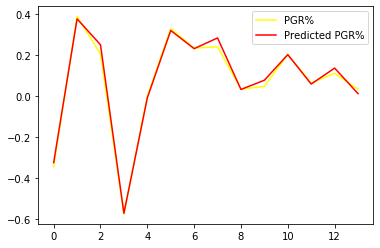

In [0]:
#6 Visualising the Multilayer Perceptrons results
plt.plot(y_test, color = 'yellow', label = 'PGR%')
plt.plot(preds, color = 'red', label = 'Predicted PGR%')
plt.legend()
pyplot.show()

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [0]:
from sklearn.ensemble import AdaBoostRegressor


from sklearn.neural_network import MLPRegressor
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

adab_reg = MLPRegressor(solver= 'lbfgs', alpha=0.0001, hidden_layer_sizes=(100,), random_state=None) #‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

# Train Adaboost Regressor
model = adab_reg.fit(X_train, y_train)


#Predict the response for test dataset
#preds = model.predict(X_test)

In [0]:
MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(100,),
              
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, random_state=1,
              shuffle=False, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=False, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
preds = model.predict(X_test)

In [0]:
adab_reg_actuals = y_test

In [0]:
forecast_errors = [y_test[i]-preds[i] for i in range(len(preds))]
bias = sum(forecast_errors) * 1.0/len(y_test)
mae = mean_absolute_error(y_test,preds)  
mse = mean_squared_error(y_test,preds)
mse = mean_squared_error(y_test,preds)
rmse = np.sqrt(mse)  
mape = np.mean(np.abs((y_test,preds) / y_test)) * 100

In [0]:
print('BIAS: %f' % bias)
print('MAE: %f' % mae)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)
print('MAPE: %f' % mape)

BIAS: -0.002439
MAE: 0.012995
MSE: 0.000299
RMSE: 0.017283
MAPE: 101.684598


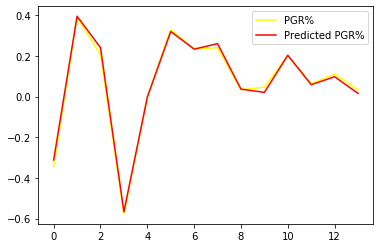

In [0]:
plt.plot(y_test, color = 'yellow', label = 'PGR%')
plt.plot(preds, color = 'red', label = 'Predicted PGR%')
plt.legend()
pyplot.show()